# HW 2. 
Implementation of Logistic Regression with Matrix multiplication approach 

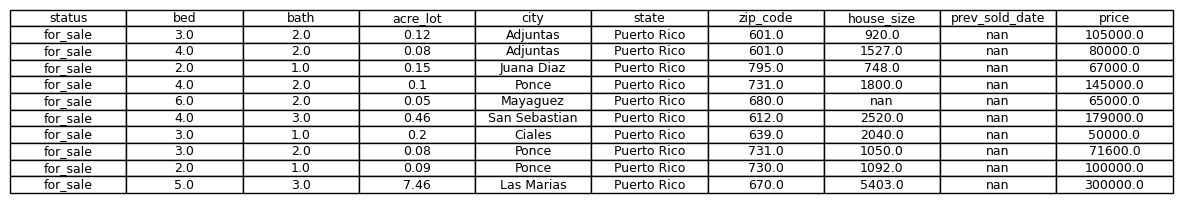

In [1]:
import matplotlib.pyplot as plt
from src.dataset_service import read_zip_csv

real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=10)

fig, ax = plt.subplots(figsize=(15, 2))  # Adjust figsize as necessary
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.show()

## Task 2.1: Implementing and Comparing Multiple Linear Regression

This section focuses on implementing a Multiple Linear Regression model using matrix multiplication and comparing its performance with the current implementation.

### 1. Implement Multiple Linear Regression using Matrix Multiplication
- Update the existing code to include an implementation of Multiple Linear Regression based on matrix operations.
- This involves representing the input features and model parameters as matrices and performing matrix multiplication to compute predictions.
- Ensure that the implementation can handle multiple input features and is scalable for larger datasets.

### 2. Performance Comparison
- After implementing the matrix-based approach, conduct a performance comparison between this new method and the current implementation of Multiple Linear Regression.
- The comparison criteria should include:
  - **Accuracy**: Compare the prediction accuracy of both implementations on a test dataset.
  - **Efficiency**: Measure and compare the time taken and computational resources used by both methods during training and prediction.
  - **Scalability**: Assess how well each implementation scales with an increase in data size and number of features.



In [348]:
import math
import numpy as np
from src.dataset_service import read_zip_csv

# Set random seed to 42
np.random.seed(42)

# Read data
real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=700)

# Create separated dataset and drop all nan
new_df = df[['bed', 'bath', 'house_size', 'price']]
new_df = new_df.dropna()


def normalize(feature):
    # Calculate the mean (average) of the feature values.
    # 'sum(feature)' computes the total sum of the feature values.
    # 'len(feature)' gives the number of values in the feature.
    mean = sum(feature) / len(feature)
    
    # Calculate the standard deviation (std) of the feature values.
    # 1. For each value xi in the feature, we compute (xi - mean)^2 which represents the squared difference 
    #    between the value and the mean. This helps measure the spread of the data.
    # 2. 'sum([(xi - mean) ** 2 for xi in feature])' computes the total sum of these squared differences.
    # 3. Dividing by 'len(feature)' gives the variance (mean of the squared differences).
    # 4. Taking the square root of the variance gives the standard deviation.
    std = math.sqrt(sum([(xi - mean) ** 2 for xi in feature]) / len(feature))
    
    # Normalize each value in the feature using Z-score normalization.
    # For each value xi in the feature, we subtract the mean and then divide by the standard deviation.
    # This process scales the values such that the feature has a mean of 0 and a standard deviation of 1.
    # This is particularly useful in many machine learning algorithms to ensure that all features have 
    # the same scale.
    return [(xi - mean) / std for xi in feature]

#TODO implement matrix for the X features
def transform_to_fmatrix(*args):
    return np.stack(args, axis=1)

def transform_to_wmatrix(*args):
    return np.stack(args, axis=1)


x1 = normalize(new_df['bed'].values)
x2 = normalize(new_df['bath'].values)
x3 = normalize(new_df['house_size'].values)
y = normalize(new_df['price'].values)

#for test
#x1 = [2,4,6,8,10,12,14,16,18,20]
#x2 = [12,14,16,18,110,112,114,116,118,120]
#x3 = [2,4,6,8,10,12,14,16,18,20]
#y = [1,2,3,4,5,6,7,8,9,10]

print("bed ->", x1[:10])
print("bath -> ", x2[:10])
print("house_size -> ", x3[:10])
print("target y -> ", y[:10])


def compute_mse(w1, w2, w3, b, x1, x2, x3, y):
    """Compute the Mean Squared Error."""
    #TODO add detailed comments with explanation of your algorithm implementation
    n = len(x1)
    total_error = sum((y[i] - (w1*x1[i] + w2*x2[i] + w3*x3[i] + b))**2 for i in range(n))
    mse = total_error / n
    return mse 

def compute_gradients(w1, w2, w3, b, x1, x2, x3, y):
    n = len(y)
    
    total_gradient_w1 = 0
    total_gradient_w2 = 0
    total_gradient_w3 = 0
    total_gradient_b = 0
    
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(n):
        #TODO implement me 
        predicted_y = w1*x1[i] + w2*x2[i] + w3*x3[i] + b
        difference = y[i] - predicted_y
        
        total_gradient_w1 -= x1[i] * difference
        total_gradient_w2 -= x2[i] * difference
        total_gradient_w3 -= x3[i] * difference
        total_gradient_b -= difference

    dw1 = (-2/n) * total_gradient_w1
    dw2 = (-2/n) * total_gradient_w2
    dw3 = (-2/n) * total_gradient_w3
    db = (-2/n) * total_gradient_b
    
    return dw1, dw2, dw3, db

def gradient_descent(x1, x2, x3, y, w1_init, w2_init, w3_init, b_init, learning_rate, num_iterations):
    w1, w2, w3, b = w1_init, w2_init, w3_init, b_init
    mse_history = []
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(num_iterations):
        dw1, dw2, dw3, db = compute_gradients(w1, w2, w3, b, x1, x2, x3, y)
        w1 += learning_rate * dw1
        w2 += learning_rate * dw2
        w3 += learning_rate * dw3
        b += learning_rate * db
        mse = compute_mse(w1, w2, w3, b, x1, x2, x3, y)
        mse_history.append(mse)
    
    return w1, w2, w3, b, mse_history


# Parameters
learning_rate = 0.0001
num_iterations = 10

#TODO implement matrix for the W 
initial_w1 = 0.1
initial_w2 = 0.1
initial_w3 = 0.1
initial_b = 1

final_w1, final_w2, final_w3, final_b, mse_history = gradient_descent(x1, x2, x3, y, initial_w1, initial_w2, initial_w3, initial_b, learning_rate, num_iterations)

for i in range(0,len(mse_history),50):
    print("MSE:",mse_history[i])


bed -> [-0.5071936642977346, 0.08376727939758978, -1.0981546079930589, 0.08376727939758978, 0.08376727939758978, -0.5071936642977346, -0.5071936642977346, -1.0981546079930589, 0.6747282230929141, -0.5071936642977346]
bath ->  [-0.44219865583271734, -0.44219865583271734, -1.160597103005744, -0.44219865583271734, 0.27619979134030936, -1.160597103005744, -0.44219865583271734, -1.160597103005744, 0.27619979134030936, -0.44219865583271734]
house_size ->  [-0.7346923048195694, -0.41234423349168153, -0.82603310921561, -0.2673672590723844, 0.11498959653894876, -0.13991497386860668, -0.6656556503341897, -0.6433515004235286, 1.6460101725493286, -0.6359167837866416]
target y ->  [-0.3188799969366907, -0.33607519988287415, -0.34501670541488955, -0.2913676722227972, -0.2679821962159877, -0.3567094434182943, -0.3418527880727918, -0.3223190375259274, -0.1847574139564598, -0.3298849268222481]
MSE: 1.8776893149111358


In [383]:
import math
import numpy as np
from src.dataset_service import read_zip_csv

# Set random seed to 42
np.random.seed(42)

# Read data
real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=700)

# Create separated dataset and drop all nan
new_df = df[['bed', 'bath', 'house_size', 'price']]
new_df = new_df.dropna()


def normalize(feature):
    # Calculate the mean (average) of the feature values.
    # 'sum(feature)' computes the total sum of the feature values.
    # 'len(feature)' gives the number of values in the feature.
    mean = sum(feature) / len(feature)
    
    # Calculate the standard deviation (std) of the feature values.
    # 1. For each value xi in the feature, we compute (xi - mean)^2 which represents the squared difference 
    #    between the value and the mean. This helps measure the spread of the data.
    # 2. 'sum([(xi - mean) ** 2 for xi in feature])' computes the total sum of these squared differences.
    # 3. Dividing by 'len(feature)' gives the variance (mean of the squared differences).
    # 4. Taking the square root of the variance gives the standard deviation.
    std = math.sqrt(sum([(xi - mean) ** 2 for xi in feature]) / len(feature))
    
    # Normalize each value in the feature using Z-score normalization.
    # For each value xi in the feature, we subtract the mean and then divide by the standard deviation.
    # This process scales the values such that the feature has a mean of 0 and a standard deviation of 1.
    # This is particularly useful in many machine learning algorithms to ensure that all features have 
    # the same scale.
    return np.array([(xi - mean) / std for xi in feature])

def transform_to_fmatrix(*args):
    """Transform individual feature arrays into a feature matrix."""
    return np.stack(args, axis=1)

# X = transform_to_fmatrix(normalize(new_df['bed'].values), 
#                          normalize(new_df['bath'].values), 
#                          normalize(new_df['house_size'].values))
# y = normalize(new_df['price'].values).reshape(-1, 1)

#for test
# Features and target for testing
x1 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
x2 = np.array([12, 14, 16, 18, 110, 112, 114, 116, 118, 120])
x3 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
X = transform_to_fmatrix(x1, x2, x3)
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)

def compute_mse(W, b, X, y):
    """Compute the Mean Squared Error."""
    return np.mean((y - (X @ W + b))**2)

def compute_gradients(W, b, X, y):
    """Compute gradients of the loss with respect to weights and bias."""
    n = len(y)
    predicted_y = X @ W + b
    difference = y - predicted_y

    dW = (-2/n) * X.T @ difference
    db = (-2/n) * difference
    return dW, db

def gradient_descent(X, y, W_init, b_init, learning_rate, num_iterations):
    """Perform gradient descent to minimize the Mean Squared Error."""
    W, b = W_init, b_init
    mse_history = []
    for i in range(num_iterations):
        dW, db = compute_gradients(W, b, X, y)
        W -= learning_rate * dW
        b -= learning_rate * np.sum(db)
        mse = compute_mse(W, b, X, y)
        mse_history.append(mse)
    
    return W, b, mse_history

# Parameters
learning_rate = 0.001
num_iterations = 100

# Initial weights and bias
initial_W = np.zeros((3, 1))
initial_b = np.ones((1, 1))

# Run gradient descent
final_W, final_b, mse_history = gradient_descent(X, y, initial_W, initial_b, learning_rate, num_iterations)

# Print MSE every 10 iterations
for i in range(0, len(mse_history), 10):
    print("MSE:", mse_history[i])


MSE: 6535.0388490000005
MSE: 5.043484766619551e+27
MSE: 3.893364334945919e+51
MSE: 3.0055183164137688e+75
MSE: 2.320137437233729e+99
MSE: 1.7910513798087984e+123
MSE: 1.3826185438995796e+147
MSE: 1.0673250692222296e+171
MSE: 8.239313789161625e+194
MSE: 6.360413867701832e+218


### Plot the results

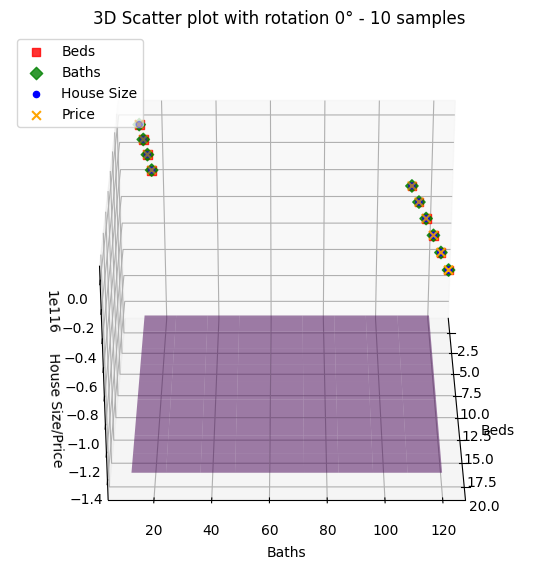

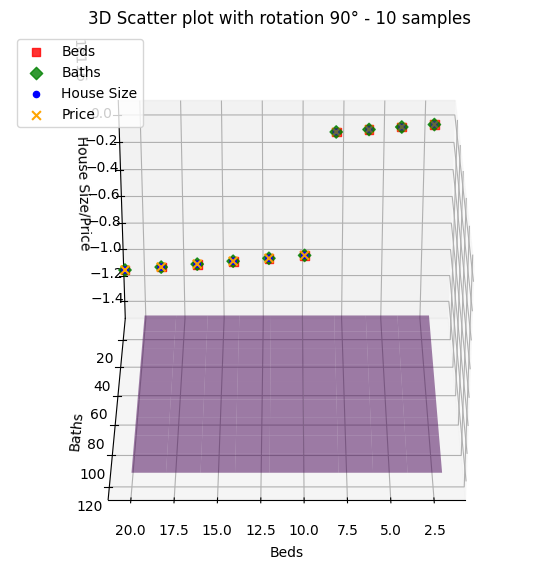

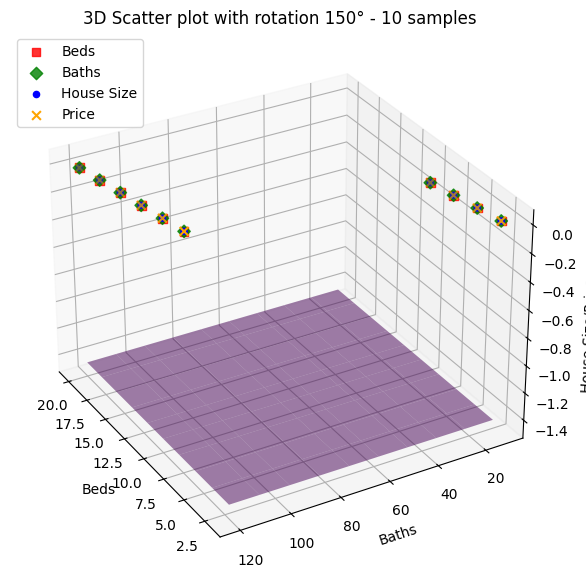

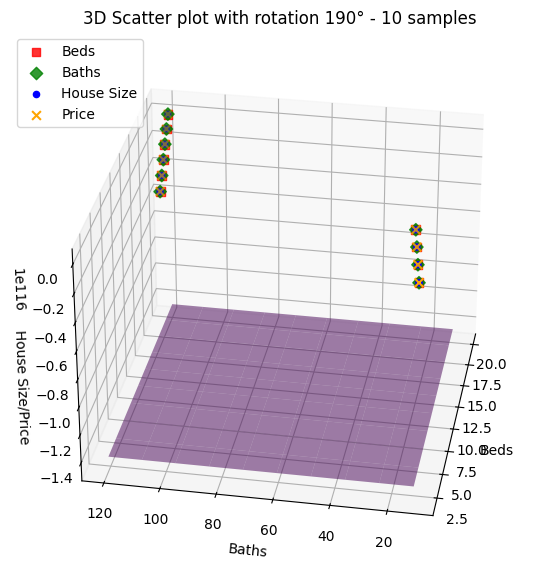

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b):
    # Define a colormap with four colors: red, green, blue, orange
    colors = ['red', 'green', 'blue', 'orange']
    cmap_name = 'custom_div_cmap'
    cm = ListedColormap(colors, name=cmap_name, N=None)

    viewpoints = [0, 90, 150, 190]  # Four different rotation angles for demonstration

    num_samples = len(x1)  # Compute the number of samples

    for view in viewpoints:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot of the actual data for Beds, Baths, House Size, and Price
        ax.scatter(x1, x2, x3, c='red', marker='s', s=40, alpha=0.8, label='Beds') # Square marker
        ax.scatter(x1, x2, x3, c='green', marker='D', s=40, alpha=0.8, label='Baths') # Diamond marker
        ax.scatter(x1, x2, x3, c='blue', marker='o', s=20, label='House Size')
        ax.scatter(x1, x2, y, c='orange', marker='x', s=40, label='Price')

        # Create a meshgrid for the plane
        x1_range = np.linspace(min(x1), max(x1), 10)
        x2_range = np.linspace(min(x2), max(x2), 10)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        x3_pred = final_w1 * x1_grid + final_w2 * x2_grid + final_b

        # Plot the regression plane
        ax.plot_surface(x1_grid, x2_grid, x3_pred, alpha=0.5, cmap='viridis', shade=True)

        ax.set_xlabel('Beds')
        ax.set_ylabel('Baths')
        ax.set_zlabel('House Size/Price')

        ax.legend(loc='upper left')  # Display legend

        # Set the viewpoint rotation
        ax.view_init(elev=None, azim=view)

        plt.title(f"3D Scatter plot with rotation {view}° - {num_samples} samples")
        plt.show()

# Sample call (replace with your data and weights)
plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b)


## Task 2.2: Multiple Linear Regression with scikit-learn

### Dataset Investigation and Feature Selection
- Load and explore `./data/realtor_data_usa.csv.zip`.
- Clean and preprocess the data.
- Identify key features through statistical analysis and domain knowledge.

### Implementation with scikit-learn
- Use scikit-learn for Multiple Linear Regression (refer to [scikit-learn documentation](https://scikit-learn.org/stable/)).
- Split data into training and testing sets.
- Train the model on the training set and evaluate using metrics like R², MSE, or MAE on the test set.
- Document the implementation process and model performance.


In [351]:
import zipfile
import pathlib
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

raw_data_path = pathlib.Path('./data/unzipped_realtor_data')

if not raw_data_path.is_dir:
    print('Unzipping file...')
    with zipfile.ZipFile('./data/realtor_data_usa.csv.zip', 'r') as zip_ref:
        zip_ref.extractall('./data/unzipped_realtor_data')
    print('Extraction ready!')

data_path = pathlib.Path(raw_data_path / 'realtor_data_usa.csv')
df = pd.read_csv(data_path)

In [352]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [353]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,775126.000000,791082.000000,638324.000000,904762.000000,6.120800e+05,9.048950e+05
mean,3.332190,2.484236,17.317292,6519.464582,2.138437e+03,8.774382e+05
std,2.065312,1.931622,970.707378,3816.713093,3.046600e+03,2.457698e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,2908.000000,1.132000e+03,2.685000e+05
50%,3.000000,2.000000,0.290000,6811.000000,1.650000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,8854.000000,2.495000e+03,8.300000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904966 entries, 0 to 904965
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          904966 non-null  object 
 1   bed             775126 non-null  float64
 2   bath            791082 non-null  float64
 3   acre_lot        638324 non-null  float64
 4   city            904894 non-null  object 
 5   state           904966 non-null  object 
 6   zip_code        904762 non-null  float64
 7   house_size      612080 non-null  float64
 8   prev_sold_date  445865 non-null  object 
 9   price           904895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 69.0+ MB


In [355]:
df.drop(columns=['prev_sold_date', 'zip_code'], axis=1, inplace=True)
df = df[df.city.isin(df.city.value_counts()[:21].index)]

In [356]:
per_missing = 100*(df.isna().sum() / len(df))
inv_col = per_missing[per_missing>0]
inv_col = inv_col.index
inv_col

Index(['bed', 'bath', 'acre_lot', 'house_size'], dtype='object')

In [357]:
df

,status,bed,bath,acre_lot,city,state,house_size,price
4516,for_sale,3.0,2.0,0.07,San Juan,Puerto Rico,1100.0,220000.0
4532,for_sale,5.0,3.0,0.07,San Juan,Puerto Rico,2100.0,189000.0
4537,for_sale,3.0,1.0,NaN,San Juan,Puerto Rico,906.0,79900.0
4538,for_sale,4.0,2.0,0.07,San Juan,Puerto Rico,1224.0,120000.0
4541,for_sale,4.0,3.0,0.30,San Juan,Puerto Rico,1500.0,174900.0
...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,NaN,New York City,New York,NaN,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,1200.0,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,NaN,449000.0


In [358]:
def fill_with_med(df, col):
    df[col].fillna(df[col].median(), inplace=True)
for c in inv_col:
    fill_with_med(df, c)
df.dropna(axis=0)




,status,bed,bath,acre_lot,city,state,house_size,price
4516,for_sale,3.0,2.0,0.07,San Juan,Puerto Rico,1100.0,220000.0
4532,for_sale,5.0,3.0,0.07,San Juan,Puerto Rico,2100.0,189000.0
4537,for_sale,3.0,1.0,0.07,San Juan,Puerto Rico,906.0,79900.0
4538,for_sale,4.0,2.0,0.07,San Juan,Puerto Rico,1224.0,120000.0
4541,for_sale,4.0,3.0,0.30,San Juan,Puerto Rico,1500.0,174900.0
...,...,...,...,...,...,...,...,...
904961,for_sale,2.0,2.0,0.07,New York City,New York,1342.0,359000.0
904962,for_sale,2.0,2.0,0.07,Bronx,New York,1200.0,299000.0
904963,for_sale,3.0,1.0,0.07,Bronx,New York,1342.0,120000.0
904964,for_sale,3.0,2.0,0.07,Bronx,New York,1342.0,449000.0


In [359]:
df.isna().sum()

status        0
bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [360]:
df.drop(index=df[df['bed']==123].index, inplace=True)

In [361]:
df.describe()

,bed,bath,acre_lot,house_size,price
count,245820.000000,245820.000000,245820.000000,245820.000000,2.458200e+05
mean,3.074180,2.301652,4.136607,1752.982544,1.607132e+06
std,2.301533,1.719895,414.971078,1896.462113,4.338117e+06
min,1.000000,1.000000,0.000000,122.000000,0.000000e+00
25%,2.000000,1.000000,0.070000,1067.000000,4.499000e+05
50%,3.000000,2.000000,0.070000,1342.000000,7.749990e+05
75%,4.000000,3.000000,0.070000,1800.000000,1.500000e+06
max,68.000000,51.000000,100000.000000,94263.000000,8.750000e+08


<Axes: >

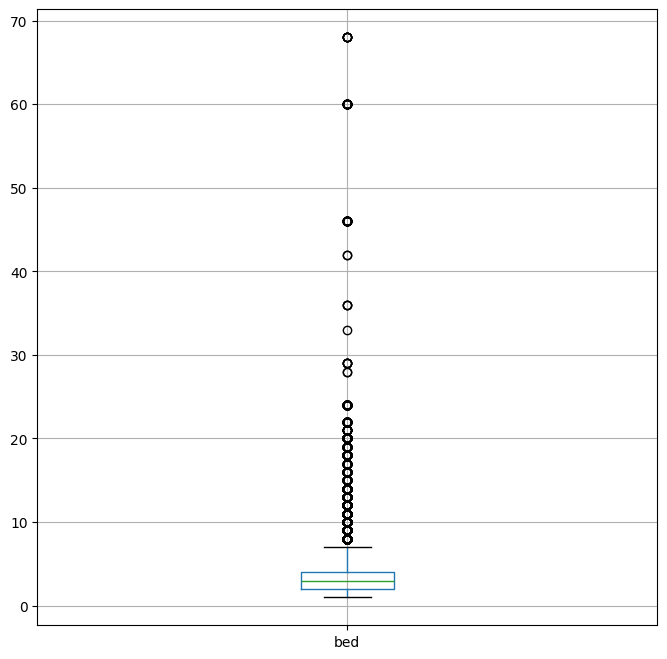

In [362]:
fig, ax = plt.subplots(figsize=(8, 8))
df.boxplot(column=['bed'], ax=ax)

<Axes: >

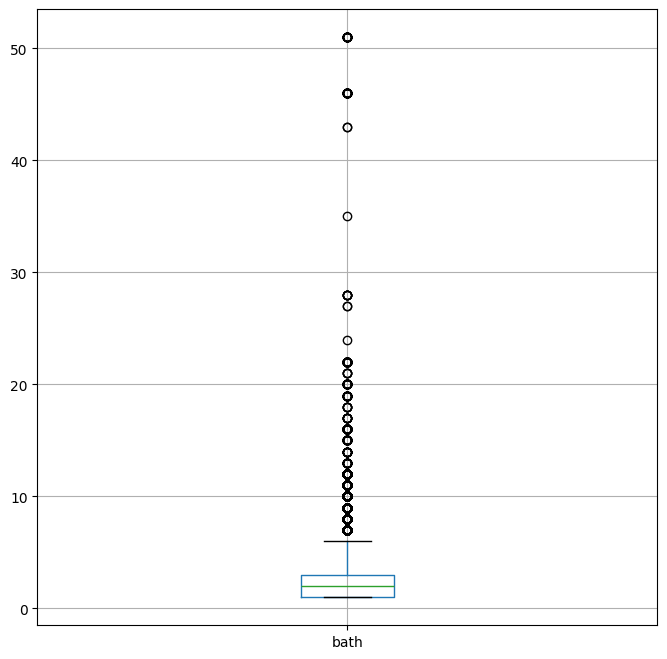

In [363]:
fig, ax = plt.subplots(figsize=(8, 8))
df.boxplot(column=['bath'], ax=ax)

In [364]:
df.bed.value_counts()[:10]

C:\Users\Sanya\AppData\Local\Temp\ipykernel_1540\3408714858.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df.bed.value_counts()[:10]


bed
3.0     73786
2.0     60570
1.0     49583
4.0     23002
5.0     12178
6.0     11416
7.0      4388
8.0      4102
9.0      2710
10.0     1302
Name: count, dtype: int64

In [365]:
df.bath.value_counts()[:10]

C:\Users\Sanya\AppData\Local\Temp\ipykernel_1540\403103909.py:1: FutureWarning: The behavior of obj[i:j] with a float-dtype index is deprecated. In a future version, this will be treated as positional instead of label-based. For label-based slicing, use obj.loc[i:j] instead
  df.bath.value_counts()[:10]


bath
1.0     84134
2.0     81693
3.0     44126
4.0     19086
5.0      7750
6.0      4393
7.0      1712
8.0      1089
9.0       529
10.0      401
Name: count, dtype: int64

In [366]:
df = df[df.bed < 6.0]

In [367]:
df = df[df.bath < 7]

In [368]:
df.reset_index(drop=True, inplace=True)

In [369]:
df.head()

,status,bed,bath,acre_lot,city,state,house_size,price
0,for_sale,3.0,2.0,0.07,San Juan,Puerto Rico,1100.0,220000.0
1,for_sale,5.0,3.0,0.07,San Juan,Puerto Rico,2100.0,189000.0
2,for_sale,3.0,1.0,0.07,San Juan,Puerto Rico,906.0,79900.0
3,for_sale,4.0,2.0,0.07,San Juan,Puerto Rico,1224.0,120000.0
4,for_sale,4.0,3.0,0.30,San Juan,Puerto Rico,1500.0,174900.0


array([[<Axes: title={'center': 'bed'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'acre_lot'}>,
        <Axes: title={'center': 'house_size'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

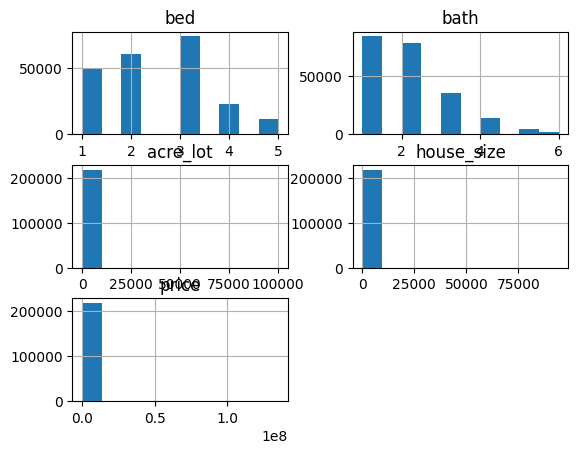

In [370]:
df.hist()

In [371]:
df.head()

,status,bed,bath,acre_lot,city,state,house_size,price
0,for_sale,3.0,2.0,0.07,San Juan,Puerto Rico,1100.0,220000.0
1,for_sale,5.0,3.0,0.07,San Juan,Puerto Rico,2100.0,189000.0
2,for_sale,3.0,1.0,0.07,San Juan,Puerto Rico,906.0,79900.0
3,for_sale,4.0,2.0,0.07,San Juan,Puerto Rico,1224.0,120000.0
4,for_sale,4.0,3.0,0.30,San Juan,Puerto Rico,1500.0,174900.0


In [372]:
df.city.value_counts()

city
New York         44996
New York City    44325
Boston           28029
Brooklyn         19427
Philadelphia     10017
Jersey City       9072
Bronx             8110
Staten Island     7396
Manhattan         6077
Newark            4445
San Juan          4181
Flushing          4052
Manchester        3996
Springfield       3446
Ludlow            3417
Hartford          3219
Jamaica           3194
Providence        2964
Cambridge         2807
Worcester         2747
Paterson          2317
Name: count, dtype: int64

In [373]:
undersample_count = 3000

# Undersample each group
undersampled_df = df.groupby('city').apply(lambda x: x.sample(min(undersample_count, len(x))))

# Reset the index of the resulting DataFrame
undersampled_df.reset_index(drop=True, inplace=True)

In [374]:
undersampled_df.head()

,status,bed,bath,acre_lot,city,state,house_size,price
0,for_sale,3.0,3.0,0.07,Boston,Massachusetts,2087.0,980000.0
1,for_sale,1.0,2.0,0.07,Boston,Massachusetts,1247.0,1550000.0
2,for_sale,4.0,4.0,0.07,Boston,Massachusetts,3500.0,6750000.0
3,for_sale,2.0,2.0,0.04,Boston,Massachusetts,980.0,450000.0
4,for_sale,2.0,2.0,0.07,Boston,Massachusetts,1398.0,769000.0


In [375]:
shuffled_df = undersampled_df.sample(frac=1, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)
shuffled_df.head()

,status,bed,bath,acre_lot,city,state,house_size,price
0,for_sale,5.0,3.0,0.14,Flushing,New York,2040.0,1250000.0
1,for_sale,2.0,2.0,0.07,Manhattan,New York,1342.0,1385000.0
2,for_sale,2.0,2.0,0.07,Brooklyn,New York,871.0,759000.0
3,for_sale,3.0,2.0,0.10,Jamaica,New York,1342.0,630000.0
4,for_sale,4.0,2.0,0.07,Staten Island,New York,3205.0,659999.0


In [376]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
shuffled_df['house_size'] = std.fit_transform(shuffled_df.house_size.values.reshape(-1, 1))
shuffled_df['acre_lot'] = std.fit_transform(shuffled_df.acre_lot.values.reshape(-1, 1))

In [377]:
shuffled_df.head()

,status,bed,bath,acre_lot,city,state,house_size,price
0,for_sale,5.0,3.0,-0.012143,Flushing,New York,0.325536,1250000.0
1,for_sale,2.0,2.0,-0.012259,Manhattan,New York,-0.158731,1385000.0
2,for_sale,2.0,2.0,-0.012259,Brooklyn,New York,-0.485508,759000.0
3,for_sale,3.0,2.0,-0.012209,Jamaica,New York,-0.158731,630000.0
4,for_sale,4.0,2.0,-0.012259,Staten Island,New York,1.133805,659999.0


In [378]:
df = pd.get_dummies(shuffled_df)
df.head()

,bed,bath,acre_lot,house_size,price,status_for_sale,status_ready_to_build,city_Boston,city_Bronx,city_Brooklyn,...,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont
0,5.0,3.0,-0.012143,0.325536,1250000.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2.0,2.0,-0.012259,-0.158731,1385000.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2.0,2.0,-0.012259,-0.485508,759000.0,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,3.0,2.0,-0.012209,-0.158731,630000.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4.0,2.0,-0.012259,1.133805,659999.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [379]:
df.drop('price', axis=1)

,bed,bath,acre_lot,house_size,status_for_sale,status_ready_to_build,city_Boston,city_Bronx,city_Brooklyn,city_Cambridge,...,state_Delaware,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont
0,5.0,3.0,-0.012143,0.325536,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2.0,2.0,-0.012259,-0.158731,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2.0,2.0,-0.012259,-0.485508,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,3.0,2.0,-0.012209,-0.158731,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4.0,2.0,-0.012259,1.133805,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61830,5.0,4.0,-0.011927,-0.158731,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
61831,4.0,3.0,-0.012259,-0.158731,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
61832,1.0,2.0,-0.012259,-0.427923,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
61833,2.0,2.0,-0.012259,-0.252393,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
error = mean_squared_error(y_test, y_pred)

In [381]:
X_train.shape, y_train.shape

((49468, 38), (49468,))

In [382]:
error

1.0423634234063123e+30